In [1]:
import numpy as np
import pandas as pd
from random import choice
#from pathlib import Path
import math
#import baumbauen as bb
from phasespace import GenParticle
import phasespace
import tensorflow as tf

import matplotlib.pyplot as plt

#import tensorflow_probability as tfp

In [2]:
boost = tf.constant([0.0, 0.0, 2962.4, 10986.9], dtype=tf.float32)
boost

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([    0. ,     0. ,  2962.4, 10986.9], dtype=float32)>

In [3]:
num_max_bg = 3
prob = 0.5
n_events = 10000

# create background tensors with -1s, as it is planned to randomize how many bg particles are used
bg_leaves = np.full((n_events, num_max_bg, 4), -1.0)
bg_SA = np.full((n_events, num_max_bg), -1)
bg_global_tag = np.chararray((n_events, num_max_bg), itemsize=30)
bg_global_tag[:,:] = "-1"



# phase space part to create the bg particles
bg_parti_names = ['BG_K','BG_pi','BG_gamma']
pi_mass = 140
K_mass = 494
gamma_mass = 0
K_1 = GenParticle(bg_parti_names[0], K_mass)
pi_1 = GenParticle(bg_parti_names[1], pi_mass)
gamma1 = GenParticle(bg_parti_names[2], gamma_mass)

Y = GenParticle('Y', 10580).set_children(K_1, pi_1, gamma1)

boost = tf.constant([0.0, 0.0, 2962.4, 10986.9], dtype=tf.float32)

weights, particles = Y.generate(n_events=n_events, boost_to=boost)
#weights, particles = Y.generate(n_events=n_events)




# read out the bg particle 4 momenta
leaves_all = np.zeros((num_max_bg, n_events, 4))      
for i in range(num_max_bg):
    leaves_all[i] = particles[bg_parti_names[i]]
leaves_all = leaves_all.swapaxes(0, 1)


In [4]:
leaves_all.shape

(10000, 3, 4)

In [5]:
leaves_all[0,0].shape

(4,)

In [6]:
phasespace.kinematics.beta(leaves_all[0,0])

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.37016054])>

## calculate theta

In [7]:
theta = tf.math.acos(leaves_all[:,:,2] / tf.math.sqrt(leaves_all[:,:,0]**2 + leaves_all[:,:,1]**2 + leaves_all[:,:,2]**2)) #theta = arccos(z/sqrt(x^2+y^2+z^2))
momentum = tf.math.sqrt(leaves_all[:,:,0]**2 + leaves_all[:,:,1]**2 + leaves_all[:,:,2]**2) 
print(theta.shape)
print(momentum.shape)

(10000, 3)
(10000, 3)


In [8]:
theta_np = np.array(theta[:])
mom_np = np.array(momentum[:,1])

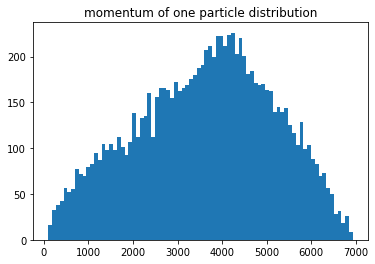

In [9]:
_ = plt.hist(mom_np, bins=80)  # arguments are passed to np.histogram
plt.title("momentum of one particle distribution")
plt.show()

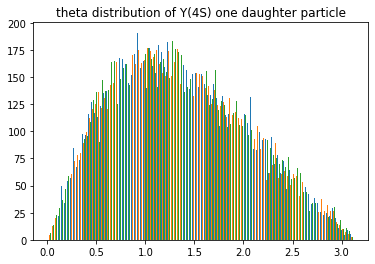

In [10]:
_ = plt.hist(theta_np, bins=100)  # arguments are passed to np.histogram
plt.title("theta distribution of Y(4S) one daughter particle")
plt.show()

## test theta cut function

In [11]:
from pathlib import Path
import sys

sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/baumbauen/notebooks')
from ah_data_utils import *

workdir = Path("/nfs/dust/belle2/user/axelheim/BranchSeparator/run_realTree_separator/data/test_10k_each_6trees_IDs_charge_wSmear")
workdir.mkdir(parents=True, exist_ok=True)
leaves = np.load(workdir / 'leaves.npy')
SA = np.load(workdir / 'is_left_arr.npy')
global_tag = np.load(workdir / 'global_tag.npy')

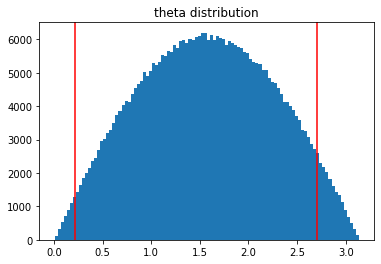

In [12]:
theta = tf.math.acos(leaves[:,:,2] / tf.math.sqrt(leaves[:,:,0]**2 + leaves[:,:,1]**2 + leaves[:,:,2]**2)) #theta = arccos(z/sqrt(x^2+y^2+z^2))
theta_np = np.array(theta)
theta_np = theta_np[SA != -1]


lower_bound = 12.4/180.0 * np.pi
upper_bound = 155.1/180.0 * np.pi

_ = plt.hist(theta_np, bins=100)  # arguments are passed to np.histogram
plt.title("theta distribution")
plt.axvline(lower_bound, 0, 1, label='pyplot vertical line', c="r")
plt.axvline(upper_bound, 0, 1, label='pyplot vertical line', c="r")
plt.show()

In [13]:
leaves, SA, global_tag = ECL_theta_cut(leaves, SA, global_tag)

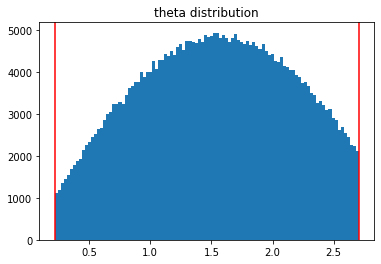

In [14]:
theta = tf.math.acos(leaves[:,:,2] / tf.math.sqrt(leaves[:,:,0]**2 + leaves[:,:,1]**2 + leaves[:,:,2]**2)) #theta = arccos(z/sqrt(x^2+y^2+z^2))
theta_np = np.array(theta)
theta_np = theta_np[SA != -1]

_ = plt.hist(theta_np, bins=100)  # arguments are passed to np.histogram
plt.title("theta distribution")
plt.axvline(lower_bound, 0, 1, label='pyplot vertical line', c="r")
plt.axvline(upper_bound, 0, 1, label='pyplot vertical line', c="r")
plt.show()

In [15]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)  

for i in range(30):
    print(leaves[i])
    print(SA[i])
    print(global_tag[i],'\n')


[[   -1.      -1.      -1.      -1.      -1.      -1.      -1.  ]
 [ -288.28  -543.11   -70.25   618.88     0.       0.09     0.07]
 [  228.54   601.62   122.19   669.85    -1.       0.99     0.  ]
 [ 1267.66    72.14  -932.09  1581.32     1.       0.95     0.  ]
 [ -204.62  -538.23  -152.38   773.83    -1.       0.01     0.99]
 [   -1.      -1.      -1.      -1.      -1.      -1.      -1.  ]
 [  558.55  1154.52   506.21  1385.91    -1.       0.88     0.09]
 [ -128.47  -106.06    -0.5    166.59     0.       0.17     0.03]
 [   -1.      -1.      -1.      -1.      -1.      -1.      -1.  ]
 [-1423.08  -302.88   631.93  1592.43    -1.       0.95     0.01]
 [  -20.12   -57.34    28.61    67.16     0.       0.04     0.06]]
[-1.  1.  2.  1.  2. -1.  0.  1. -1.  0.  2.]
[b'-1' b'gamma_1' b'BG_pi-' b'pi+_1' b'BG_K-' b'-1' b'pi-_1' b'gamma_2'
 b'-1' b'pi-_2' b'BG_gamma' b'4'] 

[[  186.73  -375.38   -78.29   652.65     1.       0.07     0.98]
 [   -1.      -1.      -1.      -1.      -1.      -1.

In [16]:
theta_deleted = 0
theta_deleted_bg = 0
bg = 0
alle = 0

for i in range(len(leaves)):
    for j in range(len(leaves[1])):
        #print(global_tag[i][j])
        
        if str(global_tag[i][j]).find("BG") != -1:
            bg += 1
        if str(global_tag[i][j]).find("-1") == -1:
            alle += 1
        
        
        if str(global_tag[i][j]).find("theta") != -1:
            print(global_tag[i][j])
            theta_deleted += 1
            if str(global_tag[i][j]).find("BG") != -1:
                theta_deleted_bg += 1
                print(global_tag[i][j],'\n')
                
            print('\n')
            

b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'K+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'gamma_4_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K+_1_DELETED_th

b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'K+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 

b'gamma_4_DELETED_theta'


b'gamma_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_3_DELETED_theta'


b'gamma_4_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_3_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'

b'K+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'K-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K+_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'K+_1_DELETED_the


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'gamma_4_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_pi-_DELETED_

b'BG_pi+_DELETED_theta' 



b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'K+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi+_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'B

b'BG_gamma_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K-_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_

b'gamma_2_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG

b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K-_2_DELETED_theta'


b'K+_1_DELETED



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_2_DELETED_theta'

b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'K+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'K-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi-_1_DELET



b'K-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'K-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_4_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi

b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi+_2_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_3_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'K-_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'gamma_3_DELETED_theta'


b'gamma_4_DELETED_theta'


b'gamma_4_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_


b'K-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'gamma_3_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'K+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'gamma_4_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'B

b'gamma_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'K-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG



b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'gamma_3_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_4_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_the


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'K+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'





b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b

b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'



b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'K-_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'K-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_2_DELETED_theta'


b'K-

b'pi+_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'



b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_1_DELETED

b'pi+_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_4_DELETED_theta'


b'gamma_3_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'K+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi+_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'K+_1_DELETED



b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'K+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'gamma_4_DELETED_theta'


b'K+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'K-_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_2_DELETED_theta




b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_2_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'K+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_th


b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'K-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'g



b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_3_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_2_



b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K-_2_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'BG_pi-_DELETED_theta'
b

b'BG_K+_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'gamma_3_DELETED_theta'


b'gamma_4_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_2_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K-


b'pi+_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'K+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'K-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_




b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'gamma_4_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'p

b'pi+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_4_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'gamma_4_D




b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'gamma_4_DELETED


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'gamma_4_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_3_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_2_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETE


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'gamma_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'gamma_4_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K-_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_1_DELETED_theta


b'K+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_K+_DELETED_theta'
b'BG_K+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'K-_2_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'gamma_2_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'gamma_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'K-_2_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 



b'pi-_1_DELETED_theta'


b'gamma_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_pi-_DELETED_theta'
b'BG_pi-_DELETED_theta' 





b'pi+_2_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'K-_1_DELETED_theta'


b'K+_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'pi-_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'gamma_3_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'pi+_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi-_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi-_2_DELETED_theta'


b'gamma_3_DELETED_theta'


b'pi-_1_DELETED_theta'


b'BG_gamma_DELETED_theta'
b'BG_gamma_DELETED_theta' 



b'BG_pi+_DELETED_theta'
b'BG_pi+_DELETED_theta' 



b'pi+_1_DELETED_theta'


b'gamma_1_DELETED_theta'


b'pi+_1_DELETED_theta'


b'pi+_2_DELETED_theta'


b'K+_1_DELETED_theta'


b'BG_K-_DELETED_theta'
b'BG_K-_DELETED_theta' 



b'K+_1_DELET

In [17]:
print(type(theta_deleted_bg))
float(theta_deleted_bg)/float(theta_deleted)

<class 'int'>


0.22021533728850803

In [18]:
bg/alle

0.22775456069667926

## test delete_specific_FSP_wCut(leaves, SA, global_tag, deletion_particle, cut)

In [19]:
pi = 0
alle = 0
pi_del = 0

for i in range(len(leaves)):
    for j in range(len(leaves[1])):
        #print(global_tag[i][j])
        
        if str(global_tag[i][j]).find("pi") != -1:
            pi += 1
            if str(global_tag[i][j]).find("DELETED") != -1:
                pi_del += 1
            
            
        if str(global_tag[i][j]).find("-1") == -1:
            alle += 1
            
print("Anteil Pionen an allen Teilchen:",round(pi/alle,3))
print("Anteil gelöschte Pionen an Pionen:",round(pi_del/pi,3))

Anteil Pionen an allen Teilchen: 0.475
Anteil gelöschte Pionen an Pionen: 0.088


In [22]:
leaves, SA, global_tag = delete_specific_FSP_wCut(leaves, SA, global_tag, "pi", 200)

In [23]:
pi = 0
alle = 0
pi_del = 0

for i in range(len(leaves)):
    for j in range(len(leaves[1])):
        #print(global_tag[i][j])
        
        if str(global_tag[i][j]).find("pi") != -1:
            pi += 1
            if str(global_tag[i][j]).find("DELETED") != -1:
                pi_del += 1
            
            
        if str(global_tag[i][j]).find("-1") == -1:
            alle += 1
            
print("Anteil Pionen an allen Teilchen:",round(pi/alle,3))
print("Anteil gelöschte Pionen an Pionen:",round(pi_del/pi,3))

Anteil Pionen an allen Teilchen: 0.475
Anteil gelöschte Pionen an Pionen: 0.128
